# Initialize

In [1]:
# Imports

import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns

import geopandas as gpd

In [2]:
# Get and print the current working directory
current_dir = os.getcwd()
print('Current Working Directory:', current_dir)

# Update and print current working directory
temp_dirpath = os.path.join('D:\\', 'Akshaya')
os.chdir(temp_dirpath)
updated_current_dir = os.getcwd()
print("Updated Current Working Directory:", updated_current_dir)

# Set and print the raw DATA directory
rawDATA_dir = os.path.join(updated_current_dir, 'DATA')
print('Raw DATA Directory:', rawDATA_dir)

# Set and print the Output directory
output_dir = os.path.join(updated_current_dir, 'LULC_dataset', 'jupyterNB_outputs')
print('Output Directory:', output_dir)

Current Working Directory: D:\Akshaya\LULC_dataset
Updated Current Working Directory: D:\Akshaya
Raw DATA Directory: D:\Akshaya\DATA
Output Directory: D:\Akshaya\LULC_dataset\jupyterNB_outputs


In [3]:
# Funtion to create a new folder at specified folder path
def create_folder(folder_path, folder_name):
    try:
        # Join folder path and folder name to create the full path
        full_path = os.path.join(folder_path, folder_name)
        
        # Check if the folder already exists
        if not os.path.exists(full_path):
            # Create the folder
            os.makedirs(full_path)
            print(f"Folder '{folder_name}' created successfully at '{folder_path}'.")
        else:
            print(f"Folder '{folder_name}' already exists at '{folder_path}'.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")     
    return full_path
        
# Create and print Output directory for the current jupyterNB
current_output_dir = create_folder(folder_path=output_dir, folder_name='02_Reference_lulc2011')
print('Current jupyterNB Output Directory:', current_output_dir)

Folder '02_Reference_lulc2011' already exists at 'D:\Akshaya\LULC_dataset\jupyterNB_outputs'.
Current jupyterNB Output Directory: D:\Akshaya\LULC_dataset\jupyterNB_outputs\02_Reference_lulc2011


# Import dataset

In [4]:
# Input 'NRSC_LULC_lookuptable.csv' filepath
lookup_table_fpath = os.path.join(output_dir, '01_NRSC_LULC_Classification', 'NRSC_LULC_lookuptable.csv')
print(lookup_table_fpath)

# Read 'NRSC_LULC_lookuptable.csv' dataset
lookup_table = pd.read_csv(lookup_table_fpath, index_col='Unnamed: 0')
print(lookup_table.shape)
lookup_table.head()

D:\Akshaya\LULC_dataset\jupyterNB_outputs\01_NRSC_LULC_Classification\NRSC_LULC_lookuptable.csv
(54, 8)


,Sl - 1,L - I,Sl - II,L - II,Sl - III,L - III,LU11_12,LU_CODE
1,1,Built Up,1.1,Urban,1.1.1,Built up - Compact (Continuous),1,010111
2,1,Built Up,1.1,Urban,1.1.2,Built up - Sparse (Discontinuous),2,010112
3,1,Built Up,1.1,Urban,1.1.3,Vegetated / Open Area,3,010109
4,1,Built Up,1.2,Rural,1.2.1,Rural,4,010201
5,1,Built Up,1.3,Industrial,1.3.1,Industrial area,5,010301


In [5]:
# Input 'lulc.shp' filepath
lulc_fpath = os.path.join(rawDATA_dir, 'LULC', 'lulc_abdul', 'lulc.shp')
print(lulc_fpath)

# Read 'lulc.shp' dataset
lulc_gdf = gpd.read_file(lulc_fpath)
print(lulc_gdf.shape)
lulc_gdf.head()

D:\Akshaya\DATA\LULC\lulc_abdul\lulc.shp
(13005, 14)


,OBJECTID,CLASS_ID,DESCRIPTIO,LUCODE,LU0506,LU11_12,Change,PI_lu,Shape_Leng,Shape_Area,Area_Ha,AREA_IN_SQ,CCIE_Chang,geometry
0,284320,215,Agricultural Land - Crop Land - More than two ...,020105,14,14,NO,None,1198.849477,4.087831e+04,4.08783,0.040878,14,"POLYGON ((916681.311 752073.687, 916655.876 75..."
1,284321,212,Agricultural Land - Crop Land - Rabi Crop,020102,11,11,NO,None,986.239224,5.000710e+04,5.00071,0.050007,11,"POLYGON ((904931.501 752186.500, 904893.187 75..."
2,284322,211,Agricultural Land - Crop Land - Kharif Crop,020101,10,14,CC,None,2565.674953,1.438456e+05,14.38460,0.143846,10,"POLYGON ((900812.875 752258.376, 900707.250 75..."
3,284323,221,Agricultural Land - Fallow - Current Fallow,020201,15,15,NO,None,2680.853229,2.186026e+05,21.86030,0.218603,15,"POLYGON ((900247.374 752386.249, 900233.564 75..."
4,284324,340,Forest - Scrub Forest,030400,23,23,NO,None,6463.012962,1.036513e+06,103.65100,1.036513,23,"POLYGON ((908454.877 751766.189, 908447.127 75..."


# Extract unique combinations of 'LU11_12' and 'L - I'

In [6]:
# Extract unique combinations of 'LU11_12' and 'L - I'
# Drop duplicates
level1_classification = lookup_table[['LU11_12', 'L - I']].drop_duplicates()
print(level1_classification.shape)
level1_classification.head()

# Create the dictionary for 'level1_classification'
l1_classification_dict = level1_classification.set_index('LU11_12')['L - I'].to_dict()
l1_classification_dict

(54, 2)


{1: 'Built Up',
 2: 'Built Up',
 3: 'Built Up',
 4: 'Built Up',
 5: 'Built Up',
 6: 'Built Up',
 7: 'Built Up',
 8: 'Built Up',
 9: 'Built Up',
 10: 'Agricultural land',
 11: 'Agricultural land',
 12: 'Agricultural land',
 13: 'Agricultural land',
 14: 'Agricultural land',
 15: 'Agricultural land',
 16: 'Agricultural land',
 17: 'Agricultural land',
 18: 'Forest',
 19: 'Forest',
 20: 'Forest',
 21: 'Forest',
 22: 'Forest',
 23: 'Forest',
 24: 'Forest',
 25: 'Forest',
 26: 'Forest',
 27: 'Forest',
 28: 'Grass/Grazing',
 29: 'Grass/Grazing',
 30: 'Grass/Grazing',
 31: 'Wastelands',
 32: 'Wastelands',
 33: 'Wastelands',
 34: 'Wastelands',
 35: 'Wastelands',
 36: 'Wastelands',
 37: 'Wastelands',
 38: 'Wastelands',
 39: 'Wastelands',
 40: 'Wetlands',
 41: 'Wetlands',
 42: 'Wetlands',
 43: 'Wetlands',
 44: 'Water bodies',
 45: 'Water bodies',
 46: 'Water bodies',
 47: 'Water bodies',
 48: 'Water bodies',
 49: 'Water bodies',
 50: 'Water bodies',
 51: 'Snow, Shifting cultivation &Rann',
 52: 

# Extract unique combinations of 'LU11_12' and 'L - II'

In [7]:
# Extract unique combinations of 'LU11_12' and 'L - II'
# Drop duplicates
level2_classification = lookup_table[['LU11_12', 'L - II']].drop_duplicates()
print(level2_classification.shape)
level2_classification.head()

# Create the dictionary for 'level2_classification'
l2_classification_dict = level2_classification.set_index('LU11_12')['L - II'].to_dict()
l2_classification_dict

(54, 2)


{1: 'Urban',
 2: 'Urban',
 3: 'Urban',
 4: 'Rural',
 5: 'Industrial',
 6: 'Industrial',
 7: 'Mining / Quarry',
 8: 'Mining / Quarry',
 9: 'Mining / Quarry',
 10: 'Cropland',
 11: 'Cropland',
 12: 'Cropland',
 13: 'Cropland',
 14: 'Cropland',
 15: 'Fallow land',
 16: 'Agriculture Plantation',
 17: 'Aquaculture',
 18: 'Evergreen / Semi evergreen',
 19: 'Evergreen / Semi evergreen',
 20: 'Deciduous (Dry / Moist / Thorn)',
 21: 'Deciduous (Dry / Moist / Thorn)',
 22: 'Forest Plantation',
 23: 'Scrub Forest',
 24: 'Swamp / Mangroves',
 25: 'Swamp / Mangroves',
 26: 'Tree Clad Area',
 27: 'Tree Clad Area',
 28: 'Alpine / Sub-Alpine',
 29: 'Temperate / Sub Tropical',
 30: 'Tropical / Desertic',
 31: 'Salt Affected Land',
 32: 'Gullied / Ravinous land',
 33: 'Gullied / Ravinous land',
 34: 'Scrub land',
 35: 'Scrub land',
 36: 'Sandy area',
 37: 'Sandy area',
 38: 'Sandy area',
 39: 'Barren rocky',
 40: 'Inland',
 41: 'Inland',
 42: 'Coastal',
 43: 'Coastal',
 44: 'River',
 45: 'River',
 46: '

In [8]:
# Map 'l1_classification_dict' and 'l2_classification_dict' to 'CCIE_Chang' and 'LU11_12'
lulc_gdf['LU0506_L1'] = lulc_gdf['CCIE_Chang'].map(l1_classification_dict)
lulc_gdf['LU11_12_L1'] = lulc_gdf['LU11_12'].map(l1_classification_dict)
lulc_gdf['LU0506_L2'] = lulc_gdf['CCIE_Chang'].map(l2_classification_dict)
lulc_gdf['LU11_12_L2'] = lulc_gdf['LU11_12'].map(l2_classification_dict)
print(lulc_gdf.shape)
lulc_gdf.head()

(13005, 18)


,OBJECTID,CLASS_ID,DESCRIPTIO,LUCODE,LU0506,LU11_12,Change,PI_lu,Shape_Leng,Shape_Area,Area_Ha,AREA_IN_SQ,CCIE_Chang,geometry,LU0506_L1,LU11_12_L1,LU0506_L2,LU11_12_L2
0,284320,215,Agricultural Land - Crop Land - More than two ...,020105,14,14,NO,None,1198.849477,4.087831e+04,4.08783,0.040878,14,"POLYGON ((916681.311 752073.687, 916655.876 75...",Agricultural land,Agricultural land,Cropland,Cropland
1,284321,212,Agricultural Land - Crop Land - Rabi Crop,020102,11,11,NO,None,986.239224,5.000710e+04,5.00071,0.050007,11,"POLYGON ((904931.501 752186.500, 904893.187 75...",Agricultural land,Agricultural land,Cropland,Cropland
2,284322,211,Agricultural Land - Crop Land - Kharif Crop,020101,10,14,CC,None,2565.674953,1.438456e+05,14.38460,0.143846,10,"POLYGON ((900812.875 752258.376, 900707.250 75...",Agricultural land,Agricultural land,Cropland,Cropland
3,284323,221,Agricultural Land - Fallow - Current Fallow,020201,15,15,NO,None,2680.853229,2.186026e+05,21.86030,0.218603,15,"POLYGON ((900247.374 752386.249, 900233.564 75...",Agricultural land,Agricultural land,Fallow land,Fallow land
4,284324,340,Forest - Scrub Forest,030400,23,23,NO,None,6463.012962,1.036513e+06,103.65100,1.036513,23,"POLYGON ((908454.877 751766.189, 908447.127 75...",Forest,Forest,Scrub Forest,Scrub Forest


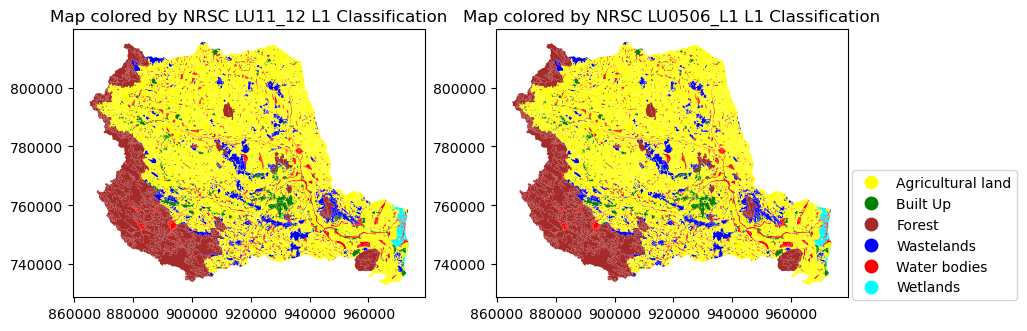

In [9]:
# Define a color dictionary for land cover types
color_dict = {'Agricultural land': '#FFFF00',  # Yellow
              'Forest': '#008000',             # Green
              'Wastelands': '#A52A2A',         # Brown
              'Water bodies': '#0000FF',       # Blue
              'Built Up': '#FF0000',           # Red
              'Wetlands': '#00FFFF'            # Cyan
             }
# Create a color map from the color dictionary
unique_categories = lulc_gdf['LU11_12_L1'].unique()
color_list = [color_dict[cat] for cat in unique_categories if cat in color_dict]
cmap = ListedColormap(color_list)

# Create 'lulc_gdf' plot
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

lulc_gdf.plot(column='LU11_12_L1', ax=ax[0], legend=False, cmap=cmap, legend_kwds={'bbox_to_anchor': (1, 1)})
# Set plot title and labels
ax[0].set_title('Map colored by {}'.format('NRSC LU11_12 L1 Classification'))

lulc_gdf.plot(column='LU0506_L1', ax=ax[1], legend=True, cmap=cmap, legend_kwds={'bbox_to_anchor': (1.5, 0.5)})
# Set plot title and labels
ax[1].set_title('Map colored by {}'.format('NRSC LU0506_L1 L1 Classification'));

In [10]:
# Change area to 'AREA_IN_SQ'
lulc_gdf['AREA_IN_SQ'] = lulc_gdf.area/10**6
print(lulc_gdf.shape)
lulc_gdf.head()

(13005, 18)


,OBJECTID,CLASS_ID,DESCRIPTIO,LUCODE,LU0506,LU11_12,Change,PI_lu,Shape_Leng,Shape_Area,Area_Ha,AREA_IN_SQ,CCIE_Chang,geometry,LU0506_L1,LU11_12_L1,LU0506_L2,LU11_12_L2
0,284320,215,Agricultural Land - Crop Land - More than two ...,020105,14,14,NO,None,1198.849477,4.087831e+04,4.08783,0.040878,14,"POLYGON ((916681.311 752073.687, 916655.876 75...",Agricultural land,Agricultural land,Cropland,Cropland
1,284321,212,Agricultural Land - Crop Land - Rabi Crop,020102,11,11,NO,None,986.239224,5.000710e+04,5.00071,0.050007,11,"POLYGON ((904931.501 752186.500, 904893.187 75...",Agricultural land,Agricultural land,Cropland,Cropland
2,284322,211,Agricultural Land - Crop Land - Kharif Crop,020101,10,14,CC,None,2565.674953,1.438456e+05,14.38460,0.143846,10,"POLYGON ((900812.875 752258.376, 900707.250 75...",Agricultural land,Agricultural land,Cropland,Cropland
3,284323,221,Agricultural Land - Fallow - Current Fallow,020201,15,15,NO,None,2680.853229,2.186026e+05,21.86030,0.218603,15,"POLYGON ((900247.374 752386.249, 900233.564 75...",Agricultural land,Agricultural land,Fallow land,Fallow land
4,284324,340,Forest - Scrub Forest,030400,23,23,NO,None,6463.012962,1.036513e+06,103.65100,1.036513,23,"POLYGON ((908454.877 751766.189, 908447.127 75...",Forest,Forest,Scrub Forest,Scrub Forest


# Sample based on 'LU11_12_L1' classification

In [11]:
# Specify the class column name and the number of samples per class
class_column = 'LU11_12_L1'  
num_samples = 30  # Number of samples per class

# Function to sample polygons from each class
def sample_polygons(gdf, class_column, num_samples):
    # Group by the class column
    grouped = gdf.groupby(class_column)
    
    # Sample polygons for each class
    sampled_gdf = grouped.apply(lambda x: x.sample(min(len(x), num_samples)))
    
    # Reset index to avoid multi-index issues
    sampled_gdf = sampled_gdf.reset_index(drop=True)
    
    return sampled_gdf

# Get the sampled polygons
sampled_gdf = sample_polygons(gdf=lulc_gdf, class_column=class_column, num_samples=num_samples)

# # Save the sampled polygons to a new shapefile (optional)
# sampled_gdf.to_file('path/to/save/sampled_shapefile.shp')

# Print the sampled polygons
print(sampled_gdf.shape)
sampled_gdf.head()

(180, 18)


,OBJECTID,CLASS_ID,DESCRIPTIO,LUCODE,LU0506,LU11_12,Change,PI_lu,Shape_Leng,Shape_Area,Area_Ha,AREA_IN_SQ,CCIE_Chang,geometry,LU0506_L1,LU11_12_L1,LU0506_L2,LU11_12_L2
0,300080,221,Agricultural Land - Fallow - Current Fallow,020201,15,15,NO,None,2844.720830,199546.013990,19.95460,0.199546,15,"POLYGON ((894794.124 756078.001, 894793.562 75...",Agricultural land,Agricultural land,Fallow land,Fallow land
1,310929,221,Agricultural Land - Fallow - Current Fallow,020201,15,11,CC,None,6107.631137,380271.737212,38.02720,0.380272,15,"POLYGON ((938868.874 784733.752, 938806.936 78...",Agricultural land,Agricultural land,Fallow land,Cropland
2,307202,212,Agricultural Land - Crop Land - Rabi Crop,020102,11,14,CC,None,1193.378747,86387.330554,8.63873,0.086387,11,"POLYGON ((958709.565 750355.187, 958730.688 75...",Agricultural land,Agricultural land,Cropland,Cropland
3,306817,215,Agricultural Land - Crop Land - More than two ...,020105,14,15,CC,None,1207.989890,71333.370250,7.13334,0.071333,14,"POLYGON ((942896.169 746060.993, 942860.094 74...",Agricultural land,Agricultural land,Cropland,Fallow land
4,295653,221,Agricultural Land - Fallow - Current Fallow,020201,15,11,CC,None,5182.400764,387772.262633,38.77720,0.387772,15,"POLYGON ((888680.437 769837.125, 888646.624 76...",Agricultural land,Agricultural land,Fallow land,Cropland


In [12]:
# Check for duplicates
sampled_gdf[sampled_gdf.duplicated()]

,OBJECTID,CLASS_ID,DESCRIPTIO,LUCODE,LU0506,LU11_12,Change,PI_lu,Shape_Leng,Shape_Area,Area_Ha,AREA_IN_SQ,CCIE_Chang,geometry,LU0506_L1,LU11_12_L1,LU0506_L2,LU11_12_L2


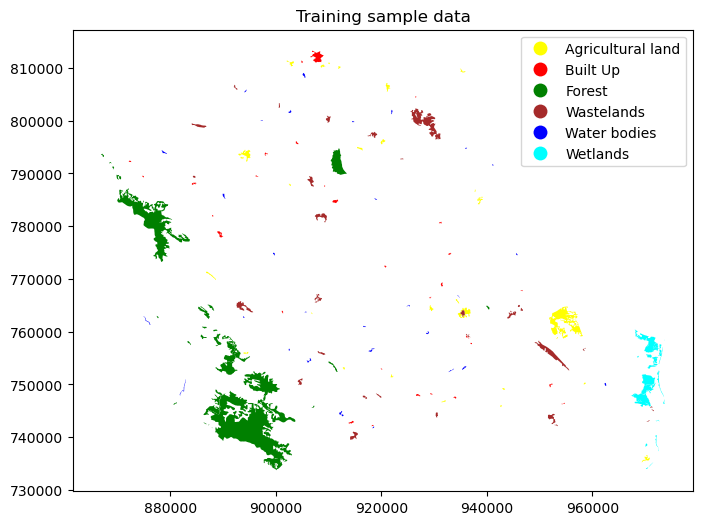

In [13]:
# Define a color dictionary for land cover types
color_dict = {'Agricultural land': '#FFFF00',  # Yellow
              'Forest': '#008000',             # Green
              'Wastelands': '#A52A2A',         # Brown
              'Water bodies': '#0000FF',       # Blue
              'Built Up': '#FF0000',           # Red
              'Wetlands': '#00FFFF'            # Cyan
             }
# Create a color map from the color dictionary
unique_categories = sampled_gdf['LU11_12_L1'].unique()
color_list = [color_dict[cat] for cat in unique_categories if cat in color_dict]
cmap = ListedColormap(color_list)

# Create 'lulc_gdf' plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sampled_gdf.plot(column='LU11_12_L1', ax=ax, legend=True, cmap=cmap, legend_kwds={'bbox_to_anchor': (1,1)})
# Set plot title and labels
ax.set_title('Training sample data')

filename = 'training_sample.jpeg'
filepath = os.path.join(current_output_dir, filename)
# Adjust layout and save the plot
# plt.tight_layout()
plt.savefig('land_use_land_cover_map.png', bbox_inches='tight')
plt.savefig(filepath);

In [14]:
# Create 'classvalue' column
classNames = list(sampled_gdf['LU0506_L1'].unique())
classValue = list(range(0, len(classNames)))
temp_dict = dict(zip(classNames, classValue))

# Map 'temp_dict' to 'LU11_12_L1' to create 'classvalue'
sampled_gdf['classvalue'] = sampled_gdf['LU11_12_L1'].map(temp_dict)
print(sampled_gdf.shape)
sampled_gdf.head()

(180, 19)


,OBJECTID,CLASS_ID,DESCRIPTIO,LUCODE,LU0506,LU11_12,Change,PI_lu,Shape_Leng,Shape_Area,Area_Ha,AREA_IN_SQ,CCIE_Chang,geometry,LU0506_L1,LU11_12_L1,LU0506_L2,LU11_12_L2,classvalue
0,300080,221,Agricultural Land - Fallow - Current Fallow,020201,15,15,NO,None,2844.720830,199546.013990,19.95460,0.199546,15,"POLYGON ((894794.124 756078.001, 894793.562 75...",Agricultural land,Agricultural land,Fallow land,Fallow land,0
1,310929,221,Agricultural Land - Fallow - Current Fallow,020201,15,11,CC,None,6107.631137,380271.737212,38.02720,0.380272,15,"POLYGON ((938868.874 784733.752, 938806.936 78...",Agricultural land,Agricultural land,Fallow land,Cropland,0
2,307202,212,Agricultural Land - Crop Land - Rabi Crop,020102,11,14,CC,None,1193.378747,86387.330554,8.63873,0.086387,11,"POLYGON ((958709.565 750355.187, 958730.688 75...",Agricultural land,Agricultural land,Cropland,Cropland,0
3,306817,215,Agricultural Land - Crop Land - More than two ...,020105,14,15,CC,None,1207.989890,71333.370250,7.13334,0.071333,14,"POLYGON ((942896.169 746060.993, 942860.094 74...",Agricultural land,Agricultural land,Cropland,Fallow land,0
4,295653,221,Agricultural Land - Fallow - Current Fallow,020201,15,11,CC,None,5182.400764,387772.262633,38.77720,0.387772,15,"POLYGON ((888680.437 769837.125, 888646.624 76...",Agricultural land,Agricultural land,Fallow land,Cropland,0


# Import dataset

In [15]:
# Convert 'sampled_gdf' to 'EPSG:4326 - WGS 84' format 
sampled_gdf.to_crs(crs='EPSG:4326', inplace=True)

# Save 'sampled_gdf' in 'EPSG:4326 - WGS 84' format as shapefile
filename = 'sampled_gdf_4326.shp'
filepath = os.path.join(current_output_dir, filename)
sampled_gdf.to_file(filepath)

In [16]:
# Convert 'sampled_gdf' in 'EPSG:4326 - WGS 84' format to 'EPSG:32644 - WGS 84 / UTM zone 44N' (Projected coordinate system)
sampled_gdf.to_crs(crs='EPSG:32644', inplace=True)

# Save as shapefile
filename = 'sampled_gdf_32644.shp'
filepath = os.path.join(current_output_dir, filename)
sampled_gdf.to_file(filepath)

In [17]:
# Save 'sampled_gdf' format as .csv
filename = 'sampled_gdf.csv'
filepath = os.path.join(current_output_dir, filename)
sampled_gdf.to_csv(filepath, index=False)

In [18]:
# Convert 'lulc_gdf' to 'EPSG:4326 - WGS 84' format 
lulc_gdf.to_crs(crs='EPSG:4326', inplace=True)

# Save 'lulc_gdf' in 'EPSG:4326 - WGS 84' format as shapefile
filename = 'lulc_gdf_4326.shp'
filepath = os.path.join(current_output_dir, filename)
lulc_gdf.to_file(filepath)

In [19]:
# Convert 'lulc_gdf' in 'EPSG:4326 - WGS 84' format to 'EPSG:32644 - WGS 84 / UTM zone 44N' (Projected coordinate system)
lulc_gdf.to_crs(crs='EPSG:32644', inplace=True)

# Save as shapefile
filename = 'lulc_gdf_32644.shp'
filepath = os.path.join(current_output_dir, filename)
lulc_gdf.to_file(filepath)

In [20]:
# Save 'lulc_gdf' format as .csv
filename = 'lulc_gdf.csv'
filepath = os.path.join(current_output_dir, filename)
lulc_gdf.to_csv(filepath, index=False)

In [21]:
# Save as shapefile
filename = 'lulc_gdf_4326.shp'
filepath = os.path.join(current_output_dir, filename)
print(filepath)

D:\Akshaya\LULC_dataset\jupyterNB_outputs\02_Reference_lulc2011\lulc_gdf_4326.shp
